In [3]:
from collections import defaultdict

In [4]:
# Класс описывающий граф
class Graph:
    
    # Конструкор
    def __init__(self):
        self.graph = defaultdict(list)
        
    def addEdge(self, source, target):
        self.graph[source].append(target)
    

## Неинформированный поиск

### Поиск в глубину

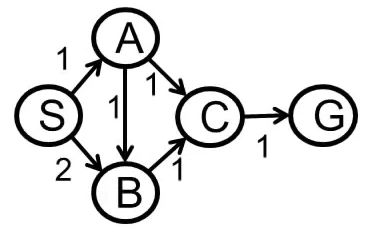

In [5]:
g1 = Graph()
g1.addEdge("S","A")
g1.addEdge("S","B")
g1.addEdge("A","B")
g1.addEdge("A","C")
g1.addEdge("B","C")
g1.addEdge("C","G")

In [6]:
def DFS(Graph, source, target):
    print(source, end = " ")
    for vertex in Graph.graph[source]:
        if vertex == target:
            print(vertex)
            return "success!"
        elif len(Graph.graph[vertex]) > 0:
            return DFS(Graph, vertex, target)
        else:
            return "Failed"

In [7]:
def DFS_paths (Graph, source, target, path=None):
    if path is None:
        path = [source]
    if source == target:
        yield path        
    for vertex in set(Graph.graph[source]) - set(path):
        yield from DFS_paths(Graph, vertex, target, path + [vertex])

In [8]:
g2 = Graph()
g2.addEdge("0","1")
g2.addEdge("0","2")
g2.addEdge("2","0")
g2.addEdge("2","3")
g2.addEdge("3","3")
g2.addEdge("1","2")

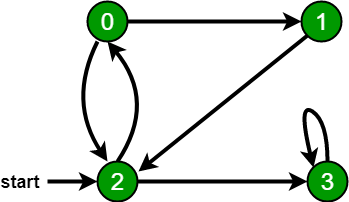

### Поиск в ширину

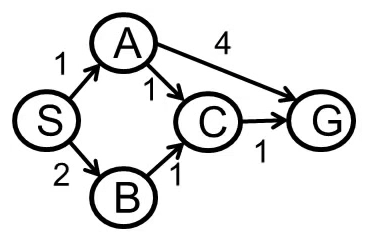

In [9]:
g3 = Graph()
g3.addEdge("S","A")
g3.addEdge("S","B")
g3.addEdge("A","C")
g3.addEdge("A","G")
g3.addEdge("C","G")
g3.addEdge("B","C")

In [10]:
def BFS(Graph, source, target):
    visited = set()
    queue = [source]
    while queue:
        vertex = queue.pop(0)
        print(vertex, end = " ")
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(set(Graph.graph[vertex]) - visited)
        if vertex == target:
            return "success"

In [11]:
BFS(g3, "S", "G")

S A B C G 

'success'

In [12]:
def BFS_paths(Graph, source, target):
    queue = [(source, [source])]
    while queue:
        (vertex, path) = queue.pop(0)
        for vertex_next in set(Graph.graph[vertex]) - set(path):
            if vertex_next == target:
                yield path + [vertex_next]
            else:
                queue.append((vertex_next, path + [vertex_next]))

In [13]:
list(BFS_paths(g3, "S", "G"))

[['S', 'A', 'G'], ['S', 'A', 'C', 'G'], ['S', 'B', 'C', 'G']]

In [14]:
list(BFS_paths(g2, "0", "3"))

[['0', '2', '3'], ['0', '1', '2', '3']]

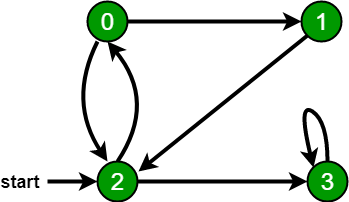

### Uniformed Cost Search

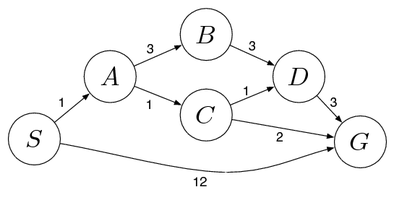

In [15]:
# Класс описывающий граф
class WeightGraph:
    
    # Конструкор
    def __init__(self):
        self.graph = defaultdict(list)
        
    def addEdge(self, source, target, weight):
        self.graph[source].append([target, weight])

In [16]:
g4 = WeightGraph()
g4.addEdge("S","A",1)
g4.addEdge("A","B",3)
g4.addEdge("A","C",1)
g4.addEdge("B","D",3)
g4.addEdge("C","D",1)
g4.addEdge("C","G",2)
g4.addEdge("D","G",3)
g4.addEdge("S","G",12)

In [17]:
def UCS(Graph, source, target):
    visited = set()
    queue = [(0, source)]
    while queue:
        queue.sort()
        print(queue)
        (price_parent, vertex) = queue.pop(0)
        if vertex == target:
            print("lowest prise = ", price_parent)
            return "success!"
        if vertex not in visited:
            visited.add(vertex)
            for [vertex_child, price] in Graph.graph[vertex]:
                queue.extend([(price + price_parent, vertex_child)])
        
    

In [18]:
UCS(g4,"S","G")

[(0, 'S')]
[(1, 'A'), (12, 'G')]
[(2, 'C'), (4, 'B'), (12, 'G')]
[(3, 'D'), (4, 'B'), (4, 'G'), (12, 'G')]
[(4, 'B'), (4, 'G'), (6, 'G'), (12, 'G')]
[(4, 'G'), (6, 'G'), (7, 'D'), (12, 'G')]
lowest prise =  4


'success!'

In [19]:
def UCS_paths(Graph, source, target):
    queue = [(0, source,[source])]
    while queue:
        queue.sort()
        (price_parent ,vertex, path) = queue.pop(0)
        for (vertex_next, price_child) in Graph.graph[vertex]:
            if vertex_next not in path:
                if vertex_next == target:
                    yield (path + [vertex_next], price_parent+ price_child)
                else:
                    queue.append((price_child + price_parent, vertex_next, path + [vertex_next]))

In [20]:
list(UCS_paths(g4,"S","G"))

[(['S', 'G'], 12),
 (['S', 'A', 'C', 'G'], 4),
 (['S', 'A', 'C', 'D', 'G'], 6),
 (['S', 'A', 'B', 'D', 'G'], 10)]

## Информированный поиск

### A*

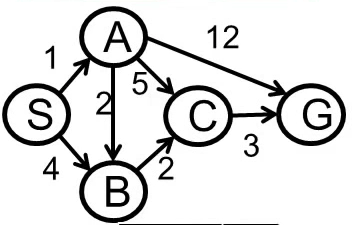

In [21]:
heurisric = {"S":7,"A": 6,"B": 2,"C": 1,"G" : 0}

In [22]:
heurisric

{'A': 6, 'B': 2, 'C': 1, 'G': 0, 'S': 7}

In [23]:
g5 = WeightGraph()
g5.addEdge("S","A",1)
g5.addEdge("S","B",4)
g5.addEdge("A","C",5)
g5.addEdge("A","G",12)
g5.addEdge("A","B",2)
g5.addEdge("C","G",3)
g5.addEdge("B","C",2)

In [24]:
def A_star(Graph, source, target):
    visited = set()
    queue = [(0 + heurisric[source],0 , source)]
    while queue:
        queue.sort()
        print(queue)
        (price_parent_with_heuristic, price_parent  ,vertex ) = queue.pop(0)
        if vertex == target:
            print("lowest price = ", price_parent)
            return "success!"
        if (vertex, price_parent) not in visited:
            visited.add((vertex, price_parent))
            for [vertex_child, price] in Graph.graph[vertex]:
                queue.extend([(price + price_parent + heurisric[vertex_child], price + price_parent, vertex_child)])
        
    

In [25]:
UCS(g5,"S","G")

[(0, 'S')]
[(1, 'A'), (4, 'B')]
[(3, 'B'), (4, 'B'), (6, 'C'), (13, 'G')]
[(4, 'B'), (5, 'C'), (6, 'C'), (13, 'G')]
[(5, 'C'), (6, 'C'), (13, 'G')]
[(6, 'C'), (8, 'G'), (13, 'G')]
[(8, 'G'), (13, 'G')]
lowest prise =  8


'success!'

In [26]:
A_star(g5,"S","G")

[(7, 0, 'S')]
[(6, 4, 'B'), (7, 1, 'A')]
[(7, 1, 'A'), (7, 6, 'C')]
[(5, 3, 'B'), (7, 6, 'C'), (7, 6, 'C'), (13, 13, 'G')]
[(6, 5, 'C'), (7, 6, 'C'), (7, 6, 'C'), (13, 13, 'G')]
[(7, 6, 'C'), (7, 6, 'C'), (8, 8, 'G'), (13, 13, 'G')]
[(7, 6, 'C'), (8, 8, 'G'), (9, 9, 'G'), (13, 13, 'G')]
[(8, 8, 'G'), (9, 9, 'G'), (13, 13, 'G')]
lowest price =  8


'success!'

In [27]:
UCS(g4,"S","G")

[(0, 'S')]
[(1, 'A'), (12, 'G')]
[(2, 'C'), (4, 'B'), (12, 'G')]
[(3, 'D'), (4, 'B'), (4, 'G'), (12, 'G')]
[(4, 'B'), (4, 'G'), (6, 'G'), (12, 'G')]
[(4, 'G'), (6, 'G'), (7, 'D'), (12, 'G')]
lowest prise =  4


'success!'

In [28]:
def A_star_paths(Graph, source, target):
    queue = [(0+heurisric[source],0, source,[source])]
    while queue:
        queue.sort()
        (price_parent_with_heuristic, price_parent ,vertex, path) = queue.pop(0)
        for (vertex_child, price_child) in Graph.graph[vertex]:
            if vertex_child not in path:
                if vertex_child == target:
                    yield (path + [vertex_child], price_parent+ price_child)
                else:
                    queue.append((price_child+ price_parent + heurisric[vertex_child], 
                                  price_child + price_parent, vertex_child, path + [vertex_child]))

In [29]:
list(A_star_paths(g5,"S","G"))

[(['S', 'A', 'G'], 13),
 (['S', 'A', 'B', 'C', 'G'], 8),
 (['S', 'A', 'C', 'G'], 9),
 (['S', 'B', 'C', 'G'], 9)]